In [1]:
import os
import pandas as pd
pd.options.display.max_rows = 999

%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

Using matplotlib backend: MacOSX


In [2]:
import sys
sys.path.insert(0,'..')
from pyASTRAHL.api import * 

In [3]:
output_folder = "../evaluation/theoretical"

# Data Parsing

In [4]:
%%time

# Get all data-files and parse them
FT_dicts = {}
for FT_folder in os.listdir(output_folder):  # iterate over FT_X folders
    if not FT_folder.startswith("FT"):
        continue
    
    FT_dicts[FT_folder] = {}
    for allowance_file in os.listdir(os.path.join(output_folder, FT_folder)):    # iterate over FT_X/Allowance_Y files
        f = os.path.join(output_folder, FT_folder, allowance_file)
        allowance = int(allowance_file.replace("Allowance_", "").replace(".json", ""))
        FT_dicts[FT_folder][allowance] = pd.read_json(f)

CPU times: user 5.8 s, sys: 257 ms, total: 6.06 s
Wall time: 6.07 s


`big_df` is a large dataframe (rows: FT, columns: Allowance) whose cells contain dataframes (rows: SP, columns: competitor / Delta_to_competitor)

In [5]:
big_df = pd.DataFrame(FT_dicts).transpose().sort_index().sort_index(axis=1)
print(len(big_df))

200


In [6]:
def extract_worse(value_df):
    return [
        len(value_df[value_df["Delta_Uniform"] > 0]),
        len(value_df[value_df["Delta_Prop"] > 0])
    ]
        
big_df.applymap(extract_worse)

,1,10,50,100,250,500,1000
FT_0,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[3, 1]","[0, 0]","[0, 0]"
FT_1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
FT_10,"[0, 0]","[1, 6]","[1, 1]","[2, 7]","[2, 6]","[9, 14]","[0, 2]"
FT_100,"[5, 8]","[8, 10]","[7, 10]","[12, 20]","[18, 25]","[14, 20]","[11, 16]"
FT_101,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
FT_102,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
FT_103,"[0, 2]","[0, 0]","[0, 2]","[0, 0]","[0, 0]","[0, 0]","[0, 1]"
FT_104,"[1, 3]","[1, 1]","[2, 3]","[4, 5]","[8, 4]","[6, 1]","[1, 0]"
FT_105,"[4, 31]","[4, 29]","[15, 34]","[10, 36]","[18, 49]","[1, 29]","[2, 20]"
FT_106,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


## A cell of big_df looks like this
It shows the Failure Chance for Astrahl's Resource Splitting, Unfiform Splitting and Proportional Splitting as well as the difference.
Negative values indicate that Astrahl is better (i.e. Failure Chance for 

In [7]:
# We can summarise the data here
big_df.loc["FT_93",500].head()

,Astrahl,Uniform,Prop,Delta_Uniform,Delta_Prop
0,0.003374,0.003254,0.002872,0.000120,0.000501
1,0.001753,0.001664,0.001595,0.000089,0.000158
2,0.001534,0.001359,0.001135,0.000175,0.000399
3,0.001090,0.001132,0.001049,-0.000041,0.000041
4,0.000248,0.000190,0.000176,0.000058,0.000072


# From each cell, extract Astrahl's / the competitor's mean system reliability (across SPs), then calculate the mean

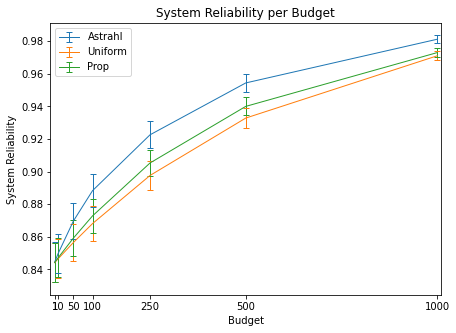

In [8]:
ax = None
def extract_and_average(value_df, column):
    return (1 - value_df[column]).mean()
    
for competitor in ["Astrahl", "Uniform", "Prop"]:
    # Average system reliability of competitor by fault tree (aggregate across starting points)
    competitor_df = big_df.applymap(lambda value_df: extract_and_average(value_df, competitor))  
#     display(col_df)

    # Plot average across fault trees (for a given competitor)
    ax = competitor_df.mean().plot(ax=ax, yerr=competitor_df.sem(), 
                                   markersize=5, 
                                   title="System Reliability per Budget",
                                   xlabel="Budget", ylabel="System Reliability",
                                   label=competitor, linewidth=1, capsize=3, figsize=(7,5), xticks=[1,10,50,100,250,500,1000],xlim=(-10,1010)) #, logx=True)
    
ax.legend()
# ax.figure.savefig("TheoreticalPlot.pgf", dpi=400,bbox_inches='tight')


# Quantify the mean advantage of Astrahl over the Competitors
Calculate the realtive difference (Comp. - Astrahl) / Astrahl

In [9]:
# First, calculate the mean System Reliability per allowance for each approach 
means = {}
for col in ["Astrahl", "Uniform", "Prop"]:
    col_df = big_df.applymap(lambda value_df: extract_and_average(value_df, col))
    means[col] = col_df.mean()

# Then, calculate the difference between competitor and Astrahl and divide it by Astrahl's value. What we get is th
mean_df = pd.DataFrame(means).round(4)
mean_df["Uniform Diff %"] = ((mean_df["Uniform"] - mean_df["Astrahl"]) / (1 - mean_df["Astrahl"]) * 100).round(decimals=2)
mean_df["Prop Diff %"] = ((mean_df["Prop"] - mean_df["Astrahl"]) / (1 - mean_df["Astrahl"]) * 100).round(decimals=2)
mean_df = mean_df[["Astrahl", "Uniform", "Uniform Diff %", "Prop", "Prop Diff %"]]
mean_df

,Astrahl,Uniform,Uniform Diff %,Prop,Prop Diff %
1,0.8445,0.8442,-0.19,0.8442,-0.19
10,0.8498,0.8465,-2.20,0.8471,-1.80
50,0.8697,0.8565,-10.13,0.8593,-7.98
100,0.8884,0.8682,-18.10,0.8729,-13.89
250,0.9226,0.8976,-32.30,0.9053,-22.35
500,0.9544,0.9329,-47.15,0.9400,-31.58
1000,0.9812,0.9711,-53.72,0.9730,-43.62
